#Import libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [4]:
import chardet

with open("car_purchasing.csv", 'rb') as f:
    result = chardet.detect(f.read())
    print(result)


{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


#Data cleaning and preparation

In [5]:
df = pd.read_csv("car_purchasing.csv", encoding='ISO-8859-1')
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [4]:
# Drop 'customer name' and 'customer e-mail' columns
df.drop(['customer name', 'customer e-mail'], axis=1, inplace=True)
df.head()

,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [5]:
# Convert float values to integer
for i in df.columns:
    if df[i].dtype == 'float64':
        df[i] = df[i].astype(int)
df.head()

,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Bulgaria,0,41,62812,11609,238961,35321
1,Belize,0,40,66646,9572,530973,45115
2,Algeria,1,43,53798,11160,638467,42925
3,Cook Islands,1,58,79370,14426,548599,67422
4,Brazil,1,57,59729,5358,560304,55915


#Data analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   country              500 non-null    object
 1   gender               500 non-null    int64 
 2   age                  500 non-null    int64 
 3   annual Salary        500 non-null    int64 
 4   credit card debt     500 non-null    int64 
 5   net worth            500 non-null    int64 
 6   car purchase amount  500 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 27.5+ KB


In [30]:
df['car purchase amount'].describe()

count      500.000000
mean     44209.292000
std      10773.182684
min       9000.000000
25%      37629.500000
50%      43997.500000
75%      51254.500000
max      80000.000000
Name: car purchase amount, dtype: float64

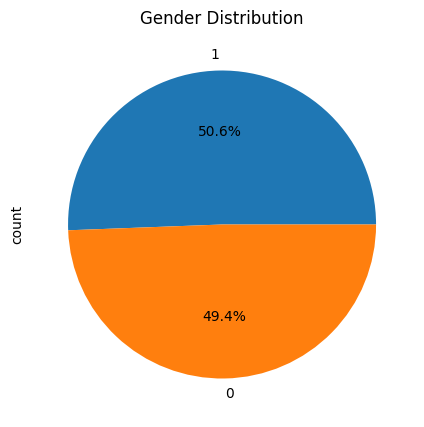

In [17]:
df['gender'].value_counts().plot(kind="pie", figsize=(5,5), autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

C:\Users\akshi\AppData\Local\Temp\ipykernel_7480\3814667738.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_countries.values, y=top_10_countries.index, palette='viridis')


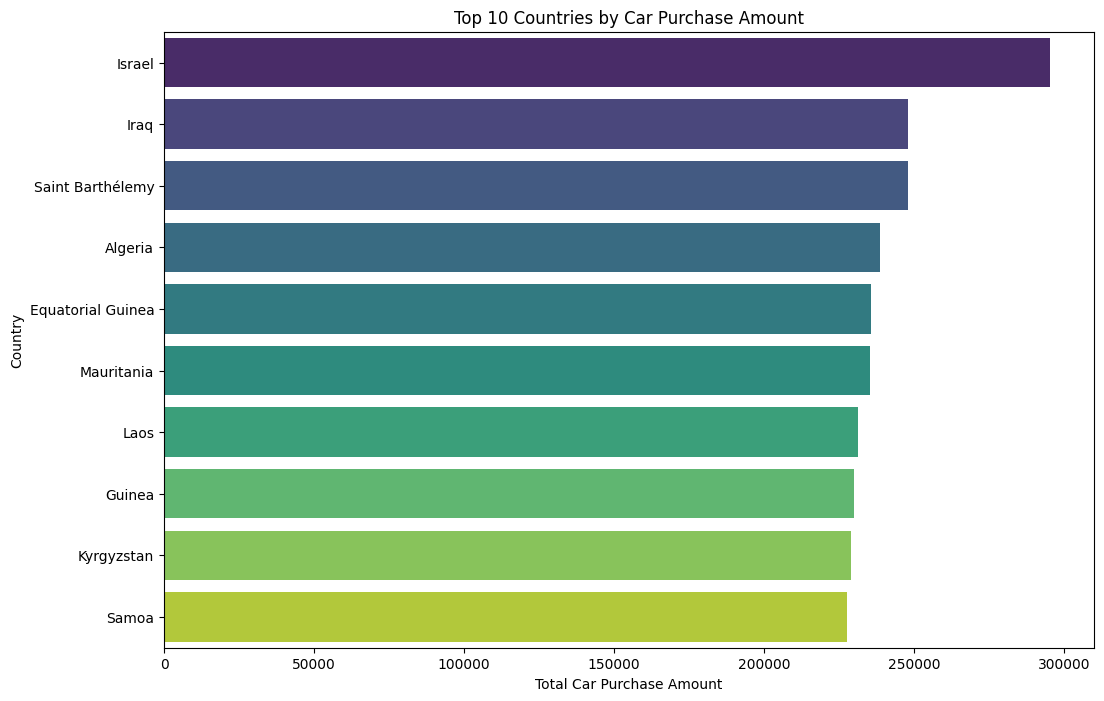

In [ ]:
country_sales = df.groupby('country')['car purchase amount'].sum()

# Sort in descending order and select the top 10 countries
top_10_countries = country_sales.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_countries.values, y=top_10_countries.index, palette='viridis')
plt.xlabel('Total Car Purchase Amount')
plt.ylabel('Country')
plt.title('Top 10 Countries by Car Purchase Amount')
plt.show()

In [ ]:
# Check skewness of numerical features
numerical_features = df.select_dtypes(include=['int64'])

if 'gender' in numerical_features.columns:
    numerical_features = numerical_features.drop(columns=['gender'])

skewness = numerical_features.skew()
print(skewness)

age                    0.013702
annual Salary         -0.087475
credit card debt      -0.063736
net worth              0.139755
car purchase amount   -0.030785
dtype: float64


#Interaction features

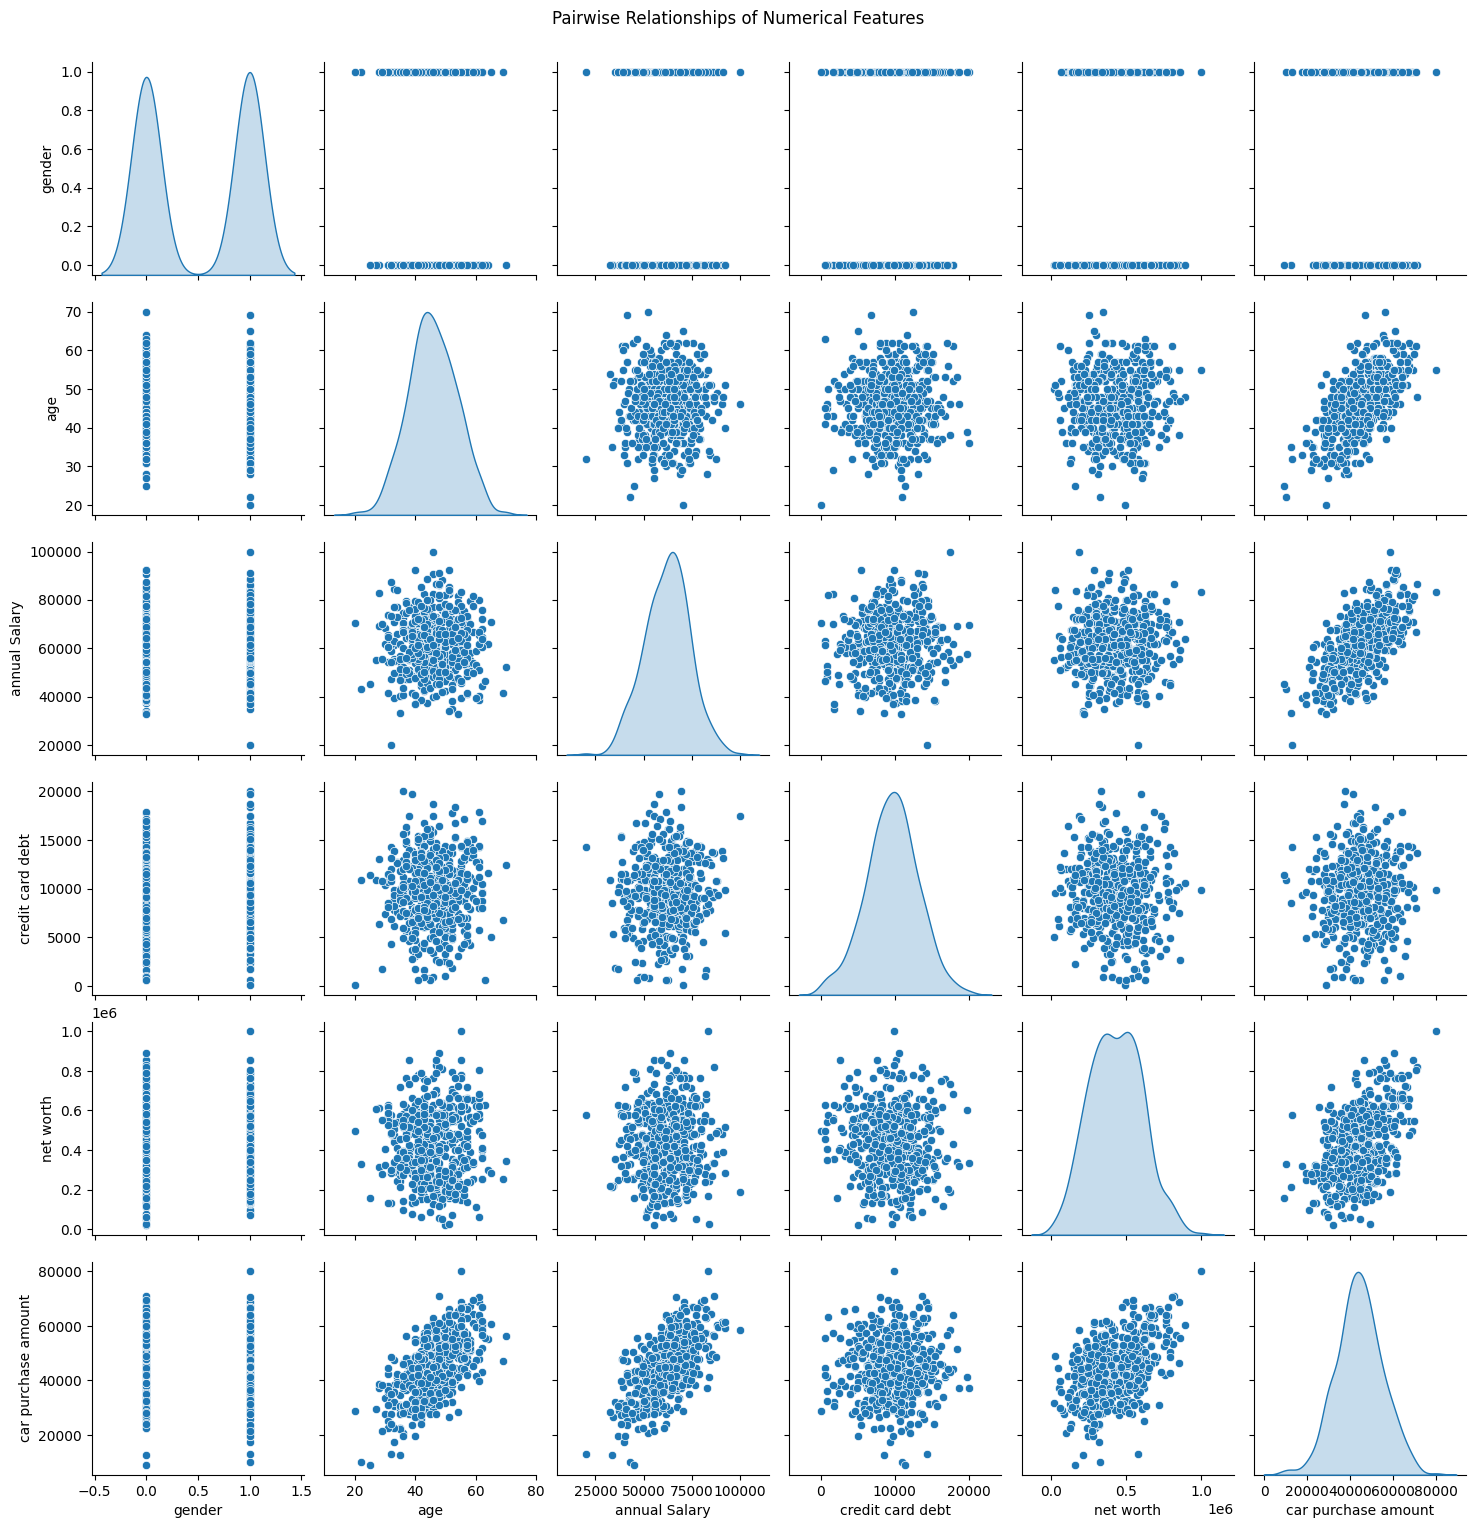

In [ ]:
#Pairplot
numerical_features = df[['gender', 'age', 'annual Salary', 'credit card debt', 'net worth', 'car purchase amount']]

sns.pairplot(numerical_features, diag_kind='kde')
plt.suptitle('Pairwise Relationships of Numerical Features', y=1.02)  
plt.show()

Text(0.5, 1.0, 'Correlation Heat Map')

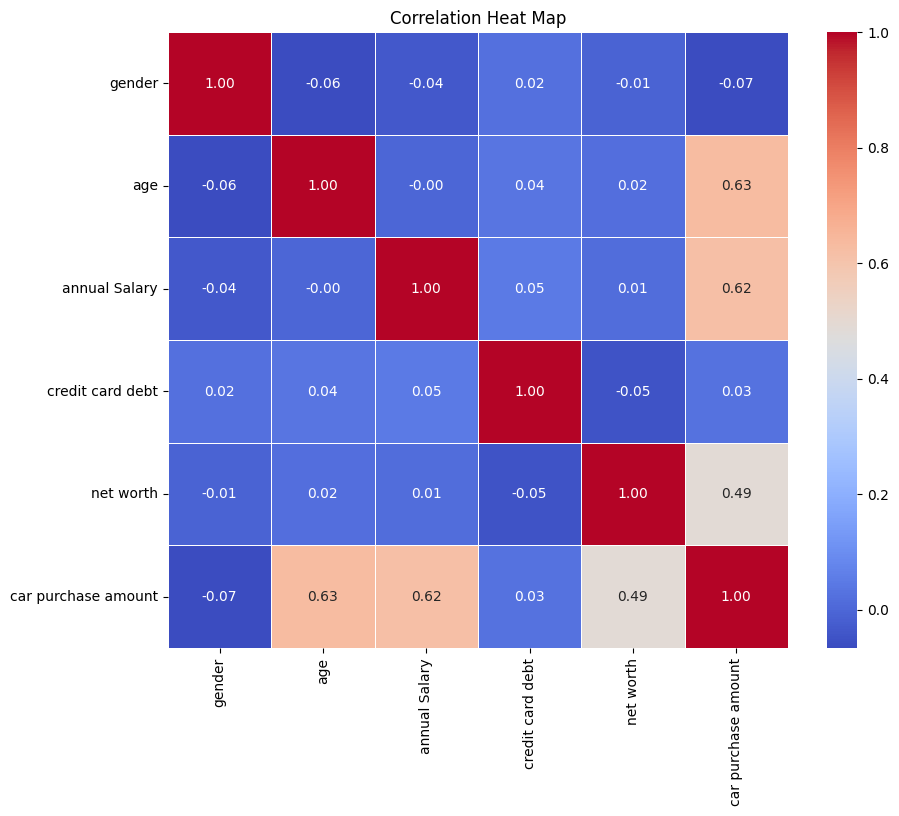

In [ ]:
#Correlation heat map
plt.figure(figsize=(10,8))
num_cols = df.select_dtypes('int','float')
heatmap = sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths = .5)
heatmap.set_title('Correlation Heat Map')

#Split the data

In [10]:
x = df.drop('car purchase amount', axis=1)
y = df['car purchase amount']
x_encoded = pd.get_dummies(x, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.2, random_state=42)

#Standardize


Linear Regression:
  - Mean Squared Error (MSE): 60635483.086599514
  - Mean Absolute Error (MAE): 6137.016865832602
  - Root Mean Squared Error (RMSE): 7786.878905350944
  - R Squared (R2): 0.4384207764299456


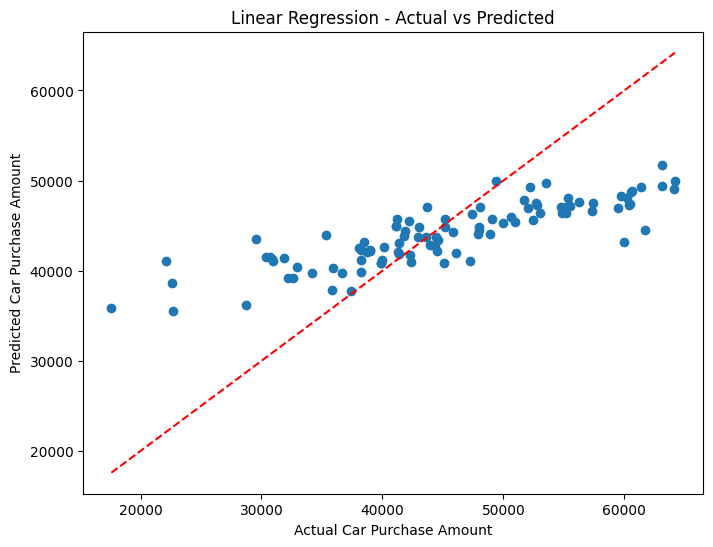

Gradient Boosting:
  - Mean Squared Error (MSE): 2530992.5278259073
  - Mean Absolute Error (MAE): 1177.1422392977029
  - Root Mean Squared Error (RMSE): 1590.9093399140968
  - R Squared (R2): 0.97655905838817


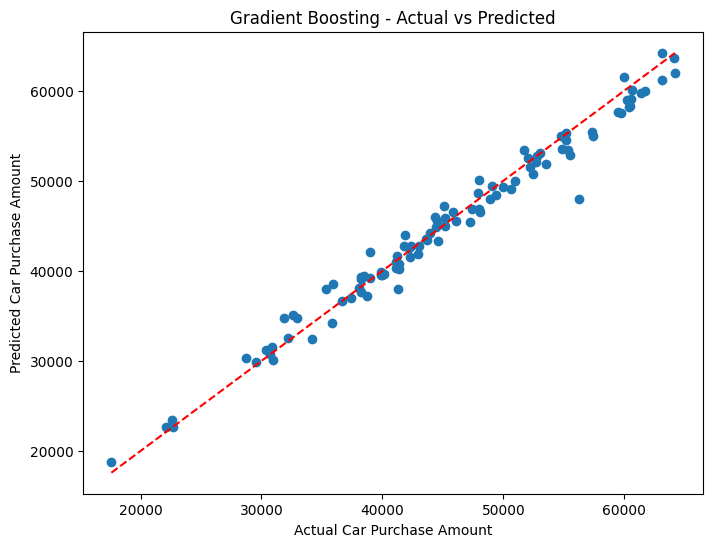

Support Vector Regression:
  - Mean Squared Error (MSE): 109890725.13076816
  - Mean Absolute Error (MAE): 8429.009730401938
  - Root Mean Squared Error (RMSE): 10482.877712287222
  - R Squared (R2): -0.01775965086894038


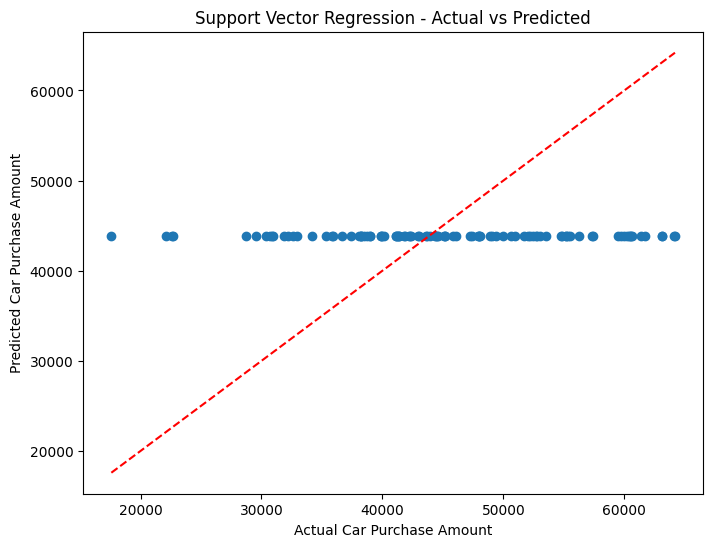

Random Forest:
  - Mean Squared Error (MSE): 5639933.306002016
  - Mean Absolute Error (MAE): 1668.0565104520024
  - Root Mean Squared Error (RMSE): 2374.854375746441
  - R Squared (R2): 0.9477654138180442


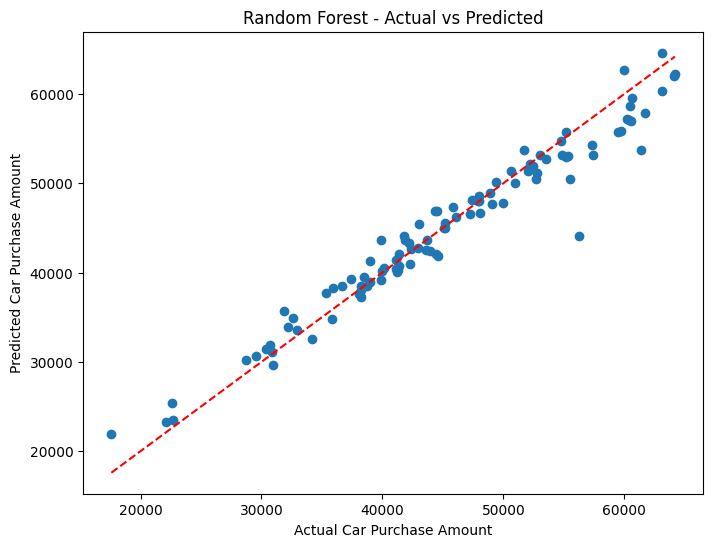

Neural Network:
  - Mean Squared Error (MSE): 1970032194.6135516
  - Mean Absolute Error (MAE): 43203.77331363553
  - Root Mean Squared Error (RMSE): 44385.0447179402
  - R Squared (R2): -17.24557328386468


c:\Users\akshi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


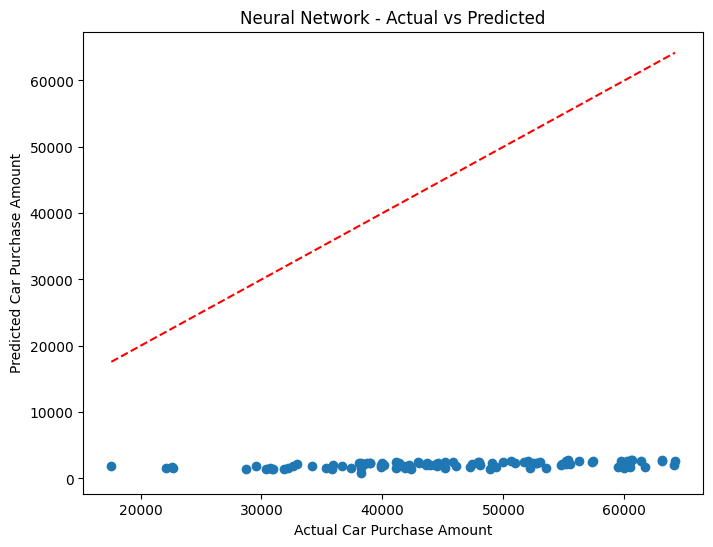

XGBoost:
  - Mean Squared Error (MSE): 4945970.315879193
  - Mean Absolute Error (MAE): 1577.8810762093751
  - Root Mean Squared Error (RMSE): 2223.953757585619
  - R Squared (R2): 0.9541925943621975


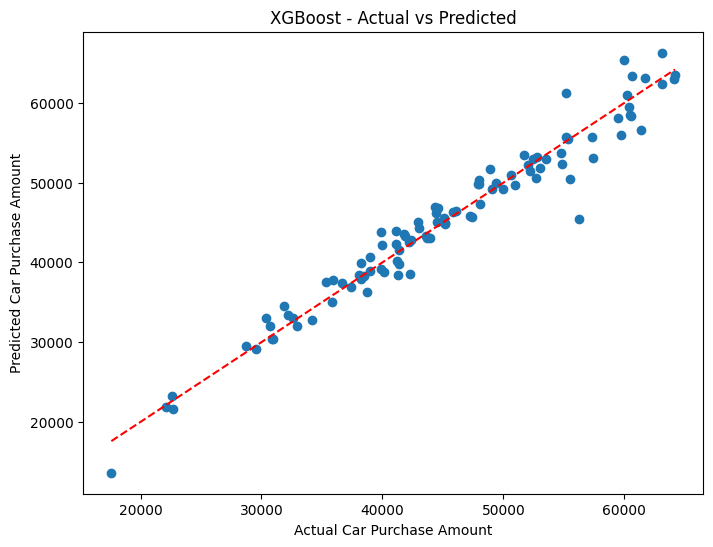

In [ ]:

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    'Linear Regression': LinearRegression(),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Support Vector Regression': SVR(kernel='rbf'),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Neural Network': MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

for name, model in models.items():

    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"{name}:")
    print(f"  - Mean Squared Error (MSE): {mse}")
    print(f"  - Mean Absolute Error (MAE): {mae}")
    print(f"  - Root Mean Squared Error (RMSE): {rmse}")
    print(f"  - R Squared (R2): {r2}")

    # Plot actual vs predicted 
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
    plt.xlabel('Actual Car Purchase Amount')
    plt.ylabel('Predicted Car Purchase Amount')
    plt.title(f'{name} - Actual vs Predicted')
    plt.show()



#Cross validation

In [ ]:
# Cross-validate each model and calculate MSE
results = {}
for name, model in models.items():
    cv_mse = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mean_cv_mse = -np.mean(cv_mse)  

    results[name] = mean_cv_mse
    print(f"{name}: Cross-Validated MSE = {mean_cv_mse}")

Linear Regression: Cross-Validated MSE = 3.381289271129316
Gradient Boosting: Cross-Validated MSE = 4991153.847274978
Support Vector Regression: Cross-Validated MSE = 118258957.00225449
Random Forest: Cross-Validated MSE = 9529063.513659133
Neural Network: Cross-Validated MSE = 47578264.533180095
XGBoost: Cross-Validated MSE = 8281779.479076162


#Learning curve analysis

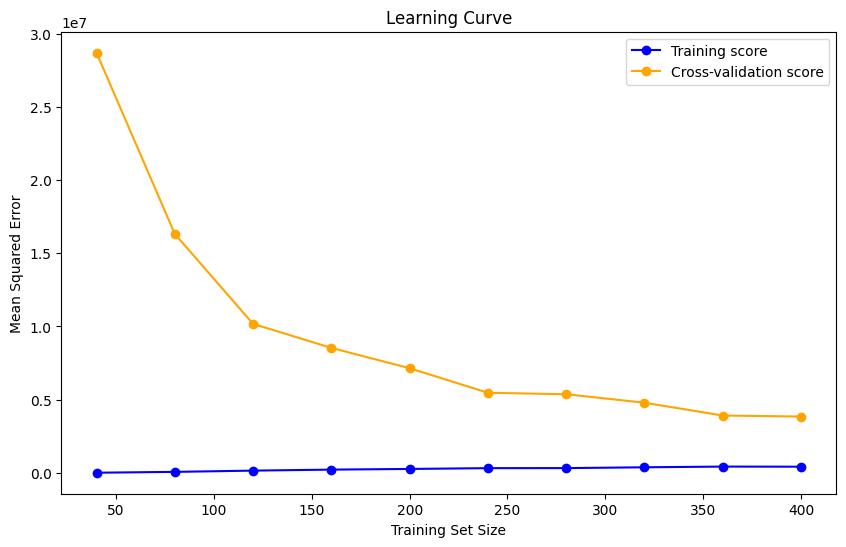

In [18]:
from sklearn.model_selection import learning_curve

model = GradientBoostingRegressor()

train_sizes, train_scores, test_scores = learning_curve(
    model, x_encoded, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='neg_mean_squared_error'
)
train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='orange', label='Cross-validation score')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve')
plt.legend()
plt.show()


Note:The gap between training and cross-validation errors, with training error being very low, suggests some level of overfitting. The model may be learning the specifics of the training data well but struggling to generalize to unseen data, as indicated by the higher cross-validation error.